# Using neural networks to replicate artistic style: an example

In [1]:
import numpy as np
import caffe
import matplotlib.pyplot as plt
%matplotlib inline

## Defining the model

In [2]:
VGG_MODEL = '../models/VGG_ILSVRC_19_layers.caffemodel'
VGG_PROTOTXT = '../models/VGG_ILSVRC_19_layers_deploy.prototxt'
# TODO: Set image preprocessing (mean pixel, dimension scaling)
vgg = caffe.Classifier(VGG_PROTOTXT, VGG_MODEL)

## Example Images

In [3]:
# We have a lot of Van Gogh!
import glob
import os
van_goghs = glob.glob('../wikiart/vincent-van-gogh/*')
size = (float(sum(os.path.getsize(f) for f in van_goghs)) / (1<<30))
print len(van_goghs), "paintings,", str(round(size, 2)) + 'GB'

1920 paintings, 1.28GB


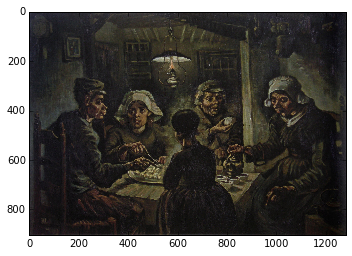

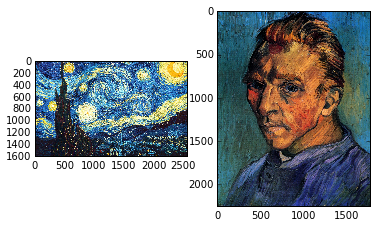

In [4]:
# Example images
potato_eaters = caffe.io.load_image('../wikiart/vincent-van-gogh/the-potato-eaters-1885-1.jpg')
plt.imshow(potato_eaters)

fig = plt.figure()

a = fig.add_subplot(1,2,1)
starry_night = caffe.io.load_image('../wikiart/vincent-van-gogh/the-starry-night-1889(1).jpg')
imgplot = plt.imshow(starry_night)

a = fig.add_subplot(1,2,2)
self_portrait = caffe.io.load_image('../wikiart/vincent-van-gogh/self-portrait-1889.jpg')
imgplot = plt.imshow(self_portrait)

## Preprocessing pipeline

In [5]:
# Create a preprocessor for the vgg model
transformer = caffe.io.Transformer({'data': vgg.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))  # Use BGR rather than RGB
# TODO: Other preprocessing steps (mean pixel, smoothing?)

## Running the network on an image

In [6]:
pe_processed = transformer.preprocess('data', potato_eaters)
vgg.blobs['data'].data[...] = pe_processed
vgg.forward()
# TODO: Learn stylistic representations from the hidden net layers

{'prob': array([[  2.14737142e-04,   2.24125921e-03,   6.85938750e-04, ...,
           8.21836584e-05,   1.71842548e-04,   2.13096142e-02],
        [  2.14737142e-04,   2.24125921e-03,   6.85938750e-04, ...,
           8.21836584e-05,   1.71842548e-04,   2.13096142e-02],
        [  2.14737142e-04,   2.24125921e-03,   6.85938750e-04, ...,
           8.21836584e-05,   1.71842548e-04,   2.13096142e-02],
        ..., 
        [  2.14737142e-04,   2.24125921e-03,   6.85938750e-04, ...,
           8.21836584e-05,   1.71842548e-04,   2.13096142e-02],
        [  2.14737142e-04,   2.24125921e-03,   6.85938750e-04, ...,
           8.21836584e-05,   1.71842548e-04,   2.13096142e-02],
        [  2.14737142e-04,   2.24125921e-03,   6.85938750e-04, ...,
           8.21836584e-05,   1.71842548e-04,   2.13096142e-02]], dtype=float32)}